Number of Data Samples:  1288
Size of a data sample:  1850
Number of Class Labels:  7
size of training Data is  966 and Testing Data is  322
done in  0.096s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.017s
Sample Data point after applying PCA
 [-2.0756044  -1.045789    2.1269348   0.03682902 -0.7575713  -0.51736414
  0.8555094   1.0519387   0.4577297   0.01347846 -0.03963818  0.63872975
  0.48167133  2.3378785   1.7784207   0.13309011 -2.2712984  -4.4569345
  2.0977333  -1.1379263   0.18844019 -0.33498392  1.125446   -0.32403105
  0.14094433  1.0769447   0.75882196 -0.09976836  3.1199534   0.88379145
 -0.8933919   1.1596087   1.4306997   1.6856066   1.3434975  -1.2590735
 -0.639143   -2.3362484  -0.01366822 -1.4639531  -0.4688633  -1.0546477
 -1.3328921   1.1363374   2.2223907  -1.8015318  -0.3063501  -1.0283136
  4.773409    3.4596145   1.9260904  -1.351676   -0.2589055   2.010412
 -1.0561559   0.3609478   1.1710399   0.75778586  0.90052253  0.599816
 -0.4

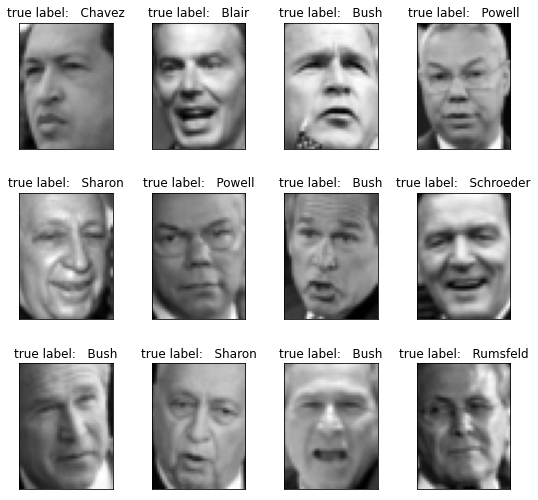

In [8]:
# Import matplotlib library 
import matplotlib.pyplot as plt

# Import scikit-learn library 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 

import time
import numpy as np 

# this command will download the LFW_people's dataset to hard disk. 
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) 
  
# introspect the images arrays to find the shapes (for plotting) 
n_samples, h, w = lfw_people.images.shape 
  
# Instead of providing 2D data, X has data already in the form of a vector that is required in this approach. 
X = lfw_people.data 
n_features = X.shape[1] 
  
# the label to predict is the id of the person 
y = lfw_people.target 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 
  
# Print Details about dataset 
print("Number of Data Samples: % d" % n_samples) 
print("Size of a data sample: % d" % n_features) 
print("Number of Class Labels: % d" % n_classes)

# Function to plot images in 3 * 4   
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4): 
    plt.figure(figsize = (1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom = 0, left = .01, right = .99, top = .90, hspace = .35) 
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1) 
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) 
        plt.title(titles[i], size = 12) 
        plt.xticks(()) 
        plt.yticks(()) 
        
# Generate true labels above the images 
def true_title(Y, target_names, i): 
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1] 
    return 'true label:   % s' % (true_name) 
  
true_titles = [true_title(y, target_names, i) for i in range(y.shape[0])] 
plot_gallery(X, true_titles, h, w) 

#-------------------------------------------------------

#brightness_5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 

print("size of training Data is % d and Testing Data is % d" %(y_train.shape[0], y_test.shape[0])) 

n_components = 150

t0 = time.time() 
pca = PCA(n_components = n_components, svd_solver ='randomized', whiten = True).fit(X_train) 
print("done in % 0.3fs" % (time.time() - t0)) 

eigenfaces = pca.components_.reshape((n_components, h, w)) 

print("Projecting the input data on the eigenfaces orthonormal basis") 
t0 = time.time() 
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test) 
print("done in % 0.3fs" % (time.time() - t0)) 

#-------------------------------------------------------
print("Sample Data point after applying PCA\n", X_train_pca[0]) 
print("-----------------------------------------------------") 
print("Dimesnsions of training set = % s and Test Set = % s"%( X_train.shape, X_test.shape)) 


# Now we use Support Vector Machine (SVM) as our classification algorithm. We train the data using the PCA 
# coefficient generated in previous steps.
print("Fitting the classifier to the training set") 
t0 = time.time() 
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], } 

clf = GridSearchCV(SVC(kernel ='rbf', class_weight ='balanced'), param_grid) 
clf = clf.fit(X_train_pca, y_train) 
print("done in % 0.3fs" % (time.time() - t0)) 
print("Best estimator found by grid search:") 
print(clf.best_estimator_) 

print("Predicting people's names on the test set") 

t0 = time.time() 
y_pred = clf.predict(X_test_pca) 
print("done in % 0.3fs" % (time.time() - t0)) 

# print classifiction results 
print(classification_report(y_test, y_pred, target_names = target_names)) 

# print confusion matrix 
print("Confusion Matrix is:") 
print(confusion_matrix(y_test, y_pred, labels = range(n_classes))) 

In [9]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')